In [1]:
import sqlite3

# Connect to SQLite (creates the DB file automatically)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product_name TEXT,
    quantity INTEGER,
    price REAL
)
""")

print("Step 1 complete: Database and table created successfully!")

conn.commit()
conn.close()

Step 1 complete: Database and table created successfully!


In [2]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Clear old data (optional)
cursor.execute("DELETE FROM sales")

# Insert realistic data
data = [
    ("iPhone 14", 4, 799),
    ("Samsung S23", 3, 749),
    ("Dell XPS 13", 2, 1199),
    ("HP Pavilion", 5, 899),
    ("AirPods Pro", 10, 249),
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

print("Step 2 complete: Data inserted successfully!")


Step 2 complete: Data inserted successfully!


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product_name,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product_name
"""

df = pd.read_sql_query(query, conn)

print("SALES SUMMARY:")
print(df)

conn.close()


SALES SUMMARY:
  product_name  total_quantity  total_revenue
0  AirPods Pro              10         2490.0
1  Dell XPS 13               2         2398.0
2  HP Pavilion               5         4495.0
3  Samsung S23               3         2247.0
4    iPhone 14               4         3196.0


  product_name  total_quantity  total_revenue
0  AirPods Pro              10         2490.0
1  Dell XPS 13               2         2398.0
2  HP Pavilion               5         4495.0
3  Samsung S23               3         2247.0
4    iPhone 14               4         3196.0


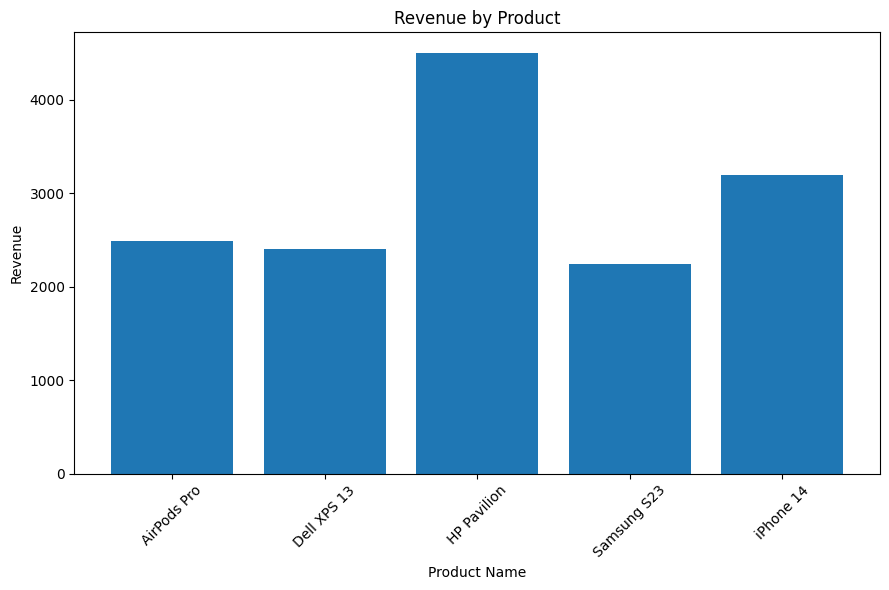

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product_name,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product_name
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)

plt.figure(figsize=(9,6))
plt.bar(df['product_name'], df['total_revenue'])
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
